In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
graph_table = pd.read_csv("graph1.txt", sep=" ", header=None).values

In [5]:
graph_table

array([[  2,   4],
       [  2,   5],
       [  9,  11],
       ...,
       [227, 754],
       [588, 754],
       [682, 754]], dtype=int64)

In [6]:
graph = nx.Graph()
graph.add_edges_from(graph_table)

In [7]:
num_nodes = graph.number_of_nodes()
num_nodes

754

In [8]:
degrees = list(graph.degree())
degrees

[(2, 48),
 (4, 7),
 (5, 7),
 (9, 3),
 (11, 3),
 (12, 8),
 (13, 3),
 (14, 3),
 (19, 3),
 (20, 3),
 (24, 5),
 (25, 5),
 (32, 1),
 (31, 4),
 (34, 4),
 (35, 3),
 (36, 16),
 (38, 4),
 (39, 3),
 (40, 3),
 (8, 3),
 (41, 3),
 (47, 7),
 (51, 4),
 (52, 22),
 (44, 7),
 (53, 4),
 (10, 28),
 (54, 33),
 (18, 6),
 (55, 10),
 (56, 8),
 (57, 17),
 (33, 1),
 (60, 15),
 (64, 8),
 (65, 2),
 (67, 4),
 (68, 4),
 (37, 2),
 (69, 2),
 (6, 7),
 (71, 17),
 (15, 12),
 (49, 13),
 (72, 25),
 (70, 2),
 (74, 12),
 (75, 2),
 (43, 8),
 (77, 8),
 (78, 11),
 (79, 16),
 (26, 3),
 (85, 14),
 (73, 3),
 (86, 2),
 (87, 2),
 (17, 12),
 (88, 7),
 (1, 4),
 (90, 1),
 (91, 12),
 (92, 1),
 (93, 17),
 (97, 7),
 (96, 5),
 (27, 2),
 (101, 14),
 (99, 2),
 (103, 7),
 (104, 2),
 (105, 5),
 (106, 5),
 (107, 5),
 (108, 4),
 (109, 18),
 (111, 2),
 (113, 1),
 (114, 3),
 (116, 3),
 (122, 18),
 (115, 1),
 (123, 5),
 (124, 8),
 (119, 7),
 (125, 9),
 (112, 2),
 (126, 1),
 (127, 4),
 (128, 4),
 (132, 1),
 (76, 3),
 (134, 2),
 (94, 14),
 (138, 14)

In [9]:
np.argmax(degrees, axis=0), np.max(degrees, axis=0)

(array([753, 328], dtype=int64), array([754,  51], dtype=int64))

In [10]:
degrees[328]

(381, 51)

In [11]:
empty_graph = nx.Graph()
if empty_graph.nodes(): # 证明空图会被认为是 Falsy
    print("QWQ")

empty_graph.add_node(1)
if empty_graph.nodes():
    print("QAQ")

QAQ


## 开始删节点

按最大度删节点，同时计算删图的一些指标。

In [12]:
from graph_indicators import graph_features

In [13]:
list_CE = []; list_RCE = []; list_RS = []; list_max_degree = []

In [14]:
from copy import deepcopy

graph_to_del = deepcopy(graph)

In [15]:
while graph_to_del.nodes():
    degrees = np.array(graph_to_del.degree)
    max_degree = np.max(degrees[:, 1])
    # 计算各种指标
    ce, rce, rs = graph_features(graph_to_del)
    list_max_degree.append(max_degree)
    list_CE.append(ce); list_RCE.append(rce); list_RS.append(rs)
    # 寻找最大的度节点
    max_degree_id = np.argmax(degrees[:, 1])
    max_degree_node = degrees[max_degree_id, 0]
    graph_to_del.remove_node(max_degree_node)


d:\program\synthetical_learning\mathematical-models-learning\competition\sduwh-2022-7-1\graph_indicators.py:63: RuntimeWarning: invalid value encountered in double_scalars
  RCE = (log_num_nodes - CE) / log_num_nodes


In [16]:
list_max_degree

[51,
 48,
 43,
 32,
 31,
 28,
 27,
 27,
 26,
 24,
 21,
 20,
 19,
 19,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 

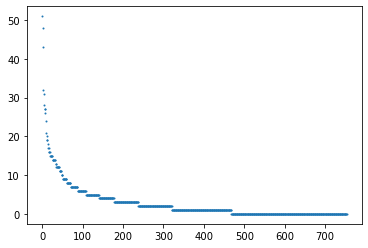

In [17]:
num_del_nodes = list(range(num_nodes))
plt.scatter(num_del_nodes, list_max_degree, label='max_degree', s=1)

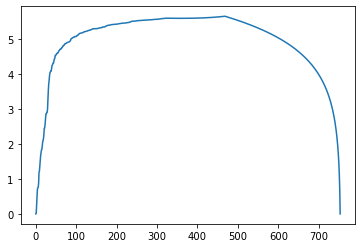

In [18]:
plt.plot(num_del_nodes, list_CE)

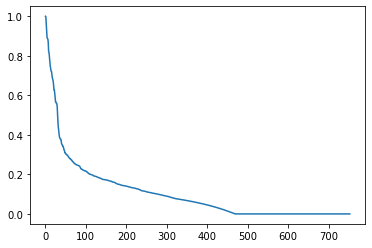

In [19]:
plt.plot(num_del_nodes, list_RCE)

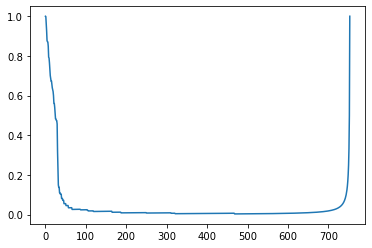

In [20]:
plt.plot(num_del_nodes, list_RS)

In [21]:
for i, rce in enumerate(list_RCE):
    if rce < 1e-12:
        break
i

468

## 第二种删除方案

In [22]:
graph.number_of_nodes(), graph_to_del.number_of_nodes()

(754, 0)

In [23]:
degrees = np.array(graph.degree())
degrees.shape

(754, 2)

In [24]:
sorted_degree = np.array(sorted(degrees, key = lambda x: x[1], reverse=True))
sorted_degree

array([[381,  51],
       [  2,  48],
       [319,  44],
       ...,
       [745,   1],
       [750,   1],
       [753,   1]], dtype=int64)

In [25]:
ex = np.array([[1, 2, 3, 4, 5, 6, 7], [1, 1, 2, 2, 3, 3, 3]]).T

In [26]:
judgement = ex[:, 1] == 3
ex[judgement]

array([[5, 3],
       [6, 3],
       [7, 3]])

In [27]:
ex[:, 1]

array([1, 1, 2, 2, 3, 3, 3])

In [28]:
np.random.choice([1, 2, 3, 4, 5, 100, -1, 'qwq'])

'-1'

随机删点

In [41]:
graph_to_del = deepcopy(graph)
list_del_nodes_1 = []
list_RCE_1 = []
list_num_c = []
del_degrees = []
print(graph_to_del.number_of_nodes())

while graph_to_del.nodes():
    degrees = np.array(graph_to_del.degree)
    # 计算指标
    ce, rce, rs = graph_features(graph_to_del)
    list_RCE_1.append(rce)
    list_num_c.append(len(list(nx.connected_components(graph_to_del))))

    max_degree = np.max(degrees[:, 1])
    # 记录所有具有最大度的点
    max_degree_nodes = degrees[degrees[:, 1] == max_degree]
    node_to_del = np.random.choice(max_degree_nodes[:, 0])
    graph_to_del.remove_node(node_to_del)
    del_degrees.append(max_degree)
    list_del_nodes_1.append(node_to_del)
    

754


d:\program\synthetical_learning\mathematical-models-learning\competition\sduwh-2022-7-1\graph_indicators.py:63: RuntimeWarning: invalid value encountered in double_scalars
  RCE = (log_num_nodes - CE) / log_num_nodes


In [35]:
del_degrees

[51,
 48,
 43,
 32,
 31,
 28,
 27,
 27,
 26,
 24,
 21,
 20,
 19,
 19,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 

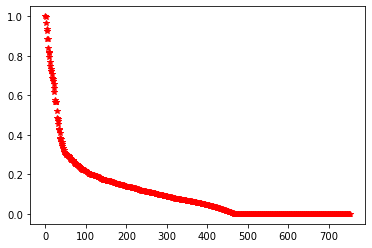

In [30]:
plt.plot(range(num_nodes), list_RCE_1, 'r*')

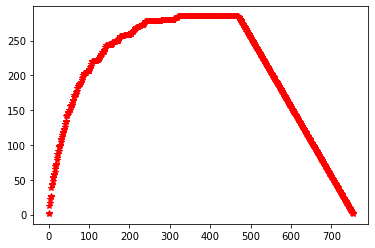

In [42]:
plt.plot(range(num_nodes), list_num_c, 'r*')

In [37]:
for i, n in enumerate(list_RCE_1):
    if n < 1e-10:
        break

i

468

In [39]:
list_RCE_1[50], list_RCE_1[51]

(0.30635372016594464, 0.30166374930350426)

### 按连通熵删点

当有多个点的度数相同时，按连通熵的大小来删点

In [31]:
from graph_indicators import connectivity_entropy

In [32]:
graph_to_del = deepcopy(graph)
list_del_nodes_2 = []
list_RCE_2 = []

while graph_to_del.nodes():
    degrees = np.array(graph_to_del.degree)
    # 计算指标
    ce, rce, rs = graph_features(graph_to_del)
    list_RCE_2.append(rce)

    max_degree = np.max(degrees[:, 1])
    # 记录所有具有最大度的点
    max_degree_nodes = degrees[degrees[:, 1] == max_degree]
    if len(max_degree_nodes > 1):
        # 计算删去该点后的连通熵，选择最大的一个
        list_ce = []
        for node in max_degree_nodes[:, 0]:
            subgraph = deepcopy(graph_to_del)
            subgraph.remove_node(node)
            ce = connectivity_entropy(subgraph)
            list_ce.append(ce)
        max_node_id = np.argmax(list_ce)
        node_to_del = max_degree_nodes[max_node_id, 0]
    else:
        node_to_del = max_degree_nodes[0, 0]
    graph_to_del.remove_node(node_to_del)
    list_del_nodes_2.append(node_to_del)

KeyboardInterrupt: 

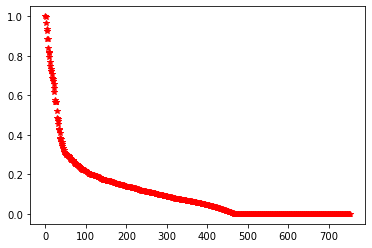

In [33]:
plt.plot(range(num_nodes), list_RCE_1, 'r*')
plt.show()

In [ ]:
from save_list import writelist

writelist(list_del_nodes_1, 'pro2-random.txt', path='nodes_to_del')
writelist(list_del_nodes_2, 'pro2-max_rce.txt', path='nodes_to_del')